<a href="https://colab.research.google.com/github/SamaaSoliman/NLP_Project/blob/main/NLP_milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read Data

In [1]:
!pip install arabic-reshaper python-bidi
!pip install wordcloud arabic_reshaper pyarabic
!pip install wordcloud arabic_reshaper python-bidi
!pip install wordcloud arabic-reshaper

In [36]:
import glob
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
# Import library for better RTL text handling
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from pyarabic.araby import strip_tashkeel
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
!unzip -q "/content/Raw Data.zip"
!unzip -q "/content/Annotations.zip"
!unzip -q "/content/Amiri.zip"

In [3]:
data = {
    "filenames" : [],
    "content" : [],
    "annotation" : []
}

In [4]:
def read_text_files(annotation_path, raw_data_path):
    for filename in sorted(os.listdir(annotation_path)):
        if filename.endswith(".json"):  # Process only .json files
            filename_without_suffix = filename.split("_annotation.json")[0]
            file_path = os.path.join(annotation_path, filename)
            with open(file_path, "r", encoding="utf-8") as file:
                json_data = json.load(file)
            data['filenames'].append(filename_without_suffix)
            data['annotation'].append(json_data)

            txt_path = os.path.join(raw_data_path, filename_without_suffix + ".txt")
            try:
                with open(txt_path, "r", encoding="utf-8") as file:
                    data['content'].append(file.read())
            except FileNotFoundError:
                print(f"File {txt_path} not found. Error!!!")
                break
    return data

In [93]:
len(os.listdir("/content/Raw Data"))

145

In [94]:
len(os.listdir("/content/Annotations"))

145

In [95]:
annotation_path = "/content/Annotations" #/content/Annotations
raw_data_path = "/content/Raw Data" #/content/Raw Data
data = read_text_files(annotation_path, raw_data_path)

In [96]:
# Remove /content/Annotations/أميتاب باتشان  الدحيح_annotation.json file
os.remove("/content/Annotations/أميتاب باتشان  الدحيح_annotation.json")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Annotations/أميتاب باتشان  الدحيح_annotation.json'

In [97]:
len(os.listdir("/content/Annotations"))

145

In [5]:
data = {
    "filenames" : [],
    "content" : [],
    "annotation" : []
}

In [6]:
annotation_path = "/content/Annotations" #/content/Annotations
raw_data_path = "/content/Raw Data" #/content/Raw Data
data = read_text_files(annotation_path, raw_data_path)

In [7]:
print(data["filenames"][0])
print(data["content"][0])
print(data["annotation"][0])

Chat GPT  الدحيح
4.25: [موسيقى]
10.32: [موسيقى]
12.139: عمي بسيوني الايام يا راجل طيب دلوقتي
15.54: افتكرت عم بسيوني سامحني يا عم بسيوني
18.66: بعدين
19.88: بعد ما استبدلتوني بالذكاء الاصطناعي
23.4: وعشان ايه عشان ايه كل ده عشان اذكى تمام
28.519: وما بيشربش سجاير في المكتب
31.7: بس اديك محتاج ولايس وسط الناس
36.899: الخبره عمرها ما تيجي من المكنه او
41.64: كمبيوتر الخبره الحقيقيه
44.96: بتيجي من الانسان اللي صانع الكمبيوتر ما
51.0: فيش احسن من الذكاء الطبيعي
54.8: ولا الرضاع الطبيعي
58.199: ولا عسل جبل النحل الطبيعي الاصلي الجميل
63.42: ارجوك يا عم بسيوني يا راجل يا طيب شوف
66.24: لنا حل وشغل لنا المكنه بسم الله الرحمن
68.28: الرحيم
70.74: خد بالك الخبره حاضر خذ الخلاصه انجز خد
74.939: الزبده بتاعت الموضوع خذ الزيتونه ماشي
77.64: بكل الخضار اللي انت عايزه خطوه خطوه
79.68: الموضوع سهل وبسيط اول حاجه جربت تدوس على
82.2: زرار الباور دوس زرار الباور ما اشتغلش
87.259: ايه ثاني لا ما فيش تاني
94.799: لو السخان بتاعك بايظ مش انا هصلحه بس
99.0: اعرف حد بيصلح سخانات كويس قوي
104.84: [موسيقى]
11

## Clean Timestamps

In [8]:
def clean_timestamps(data):
    cleaned_text_videos = []

    for content in data["content"]:
        cleaned_lines = []

        for line in content.split("\n"):
            # Skip empty lines
            if not line.strip():
                continue
            # Check if there's a number pattern before a colon
            if ":" in line:
                parts = line.split(':', 1)
                # Check if part before colon contains only numbers and dots
                if all(c.isdigit() or c == '.' for c in parts[0].strip()):
                    cleaned_line = parts[1].strip()
                    cleaned_lines.append(cleaned_line)
                else:
                    cleaned_lines.append(line)
            else:
                cleaned_lines.append(line)

        # Append cleaned data to the new dictionary
        cleaned_text_videos.append('\n'.join(cleaned_lines))
    data['content'] = cleaned_text_videos
    return data

In [9]:
data = clean_timestamps(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

طبعًا يا "جون"،
انت مستغرب، احنا خاظفينك ليه!
لا، والله، كتر خيركم!
دا كان فيه واحد هيعجنّي ضرب،
لولا إن انتم، الحمد لله،
خطفتوني وأنقذتم حياتي!
حلو، انت تم اختيارك
لمشروع سرّي وضخم يا "جون"،
مشروع هينقذ العالم،
وليك مكافأة مالية كبيرة أوي.
دا أنا كلب فلوس، اؤمرني.
قبل ما أقولّك أي تفاصيل
عن المشروع يا "جون"،
لازم تعرف إن حياتك كما تعرفها، ستنتهي.
ما هي أصلًا منتهية،
هو اللي احنا عايشينها دي عيشة؟
بس، لا مؤاخذة يا باشا،
اشمعنى اختارتوني أنا بالذات؟
زي ما قلتلك، المشروع دا سرّي للغاية،
واللي يشتر


## Remove Special Music Token


In [10]:
def remove_special_music_token(data):
    cleaned_text_videos = []

    for content in data["content"]:
        # Split into lines and remove the [موسيقى] token
        lines = content.split("\n")
        cleaned_lines = [line.replace("[موسيقى]", "").strip() for line in lines]
        cleaned_lines = [line for line in cleaned_lines if line]  # Remove empty lines

        # Append cleaned content
        cleaned_text_videos.append('\n'.join(cleaned_lines))

    # Update the content in the original dictionary
    data["content"] = cleaned_text_videos
    return data

In [11]:
data = remove_special_music_token(data)
print(data["content"][2][:500])  # Print first 500 characters of the first cleaned content

انتم عارفين يا جماعة؟ احنا بقالنا
13 يوم مع بعض محبوسين في الغواصة!
وبصراحة، كانوا 13 يوم في منتهى...!
يا عم مش وقت "ديستويفسكي" دلوقتي!
دوس على الزرار!
ادّيني فرصة أفكر طيب!
بقولّك، مفيش وقت. "حسنينوف" بيضيع!
يا حبيبي يلّا، الراجل خرملي ودني!
- استنى!
- طب يلّا، يلّا، دوس على الزرار!
يعني انتم عايزينّي أدوس يعني؟
بقولّك دوس، ورحمة أبوك تدوس!
مش عارف! حاسس إن أنا محتاج أشقلب جنيه،
علشان نبقى سيبنا الموضوع للحظ!
جنيه إيه يا حمار، يا جاهل؟!
احنا عملتنا الروبل!
يا "أبو عوف"، اخلص!
"حسنينوف" عنده Br


## Normalize Arabic Text

In [12]:
def normalize_arabic_text(data):
    normalized_texts = []

    # Define character mappings
    char_mappings = {
        'أ': 'ا',
        'إ': 'ا',
        'آ': 'ا',
        'ى': 'ي',
        'ة': 'ه',
        'ؤ': 'و',
        'ئ': 'ي'
    }

    for content in data["content"]:
        # Apply all character replacements
        for original, replacement in char_mappings.items():
            content = content.replace(original, replacement)
        normalized_texts.append(content)  # Store normalized content

    # Update content in the original dictionary
    data["content"] = normalized_texts
    return data

In [13]:
data = normalize_arabic_text(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

طبعًا يا "جون"،
انت مستغرب، احنا خاظفينك ليه!
لا، والله، كتر خيركم!
دا كان فيه واحد هيعجنّي ضرب،
لولا ان انتم، الحمد لله،
خطفتوني وانقذتم حياتي!
حلو، انت تم اختيارك
لمشروع سرّي وضخم يا "جون"،
مشروع هينقذ العالم،
وليك مكافاه ماليه كبيره اوي.
دا انا كلب فلوس، اومرني.
قبل ما اقولّك اي تفاصيل
عن المشروع يا "جون"،
لازم تعرف ان حياتك كما تعرفها، ستنتهي.
ما هي اصلًا منتهيه،
هو اللي احنا عايشينها دي عيشه؟
بس، لا مواخذه يا باشا،
اشمعني اختارتوني انا بالذات؟
زي ما قلتلك، المشروع دا سرّي للغايه،
واللي يشتر


## Remove stopwords

In [14]:
def remove_stopwords(data):
    arabic_stopwords = set([
      'في', 'من', 'على', 'الى', 'عن', 'و', 'ان', 'او', 'هذا', 'هذه', 'ما', 'هو', 'هي',
      'كان', 'كانت', 'يكون', 'تكون', 'لا', 'لم', 'له', 'لها', 'بالتالي', 'حتى', 'عند', 'بعد',
       'مش','يعني','انت','ولكن','بقي','بس','زي','دي','عشان','علي','يا','ولا','فيه','كدا','قبل', 'مع', 'الذي', 'دا', 'الذين',
      'انا','ايه','اللي', 'هؤلاء','فيها','احنا','أولئك', 'كل', 'بعض'])
    cleaned_all_content = []

    for text in data["content"]:
        cleaned_single_content = []
        lines = text.split('\n')  # Split text into lines
        for line in lines:
            words = line.split(" ")
            filtered_words = [word for word in words if word not in arabic_stopwords]  # Remove stopwords
            cleaned_single_content.append(" ".join(filtered_words))  # Join words back into a string
        cleaned_single_content_joined = "\n".join(cleaned_single_content)  # Join lines back into a string
        cleaned_all_content.append(cleaned_single_content_joined)

    # Update the content field in the dictionary
    data["content"] = cleaned_all_content

    return data

In [15]:
data = remove_stopwords(data)

print(data["content"][1][:500])

طبعًا "جون"،
مستغرب، خاظفينك ليه!
لا، والله، كتر خيركم!
واحد هيعجنّي ضرب،
لولا انتم، الحمد لله،
خطفتوني وانقذتم حياتي!
حلو، تم اختيارك
لمشروع سرّي وضخم "جون"،
مشروع هينقذ العالم،
وليك مكافاه ماليه كبيره اوي.
كلب فلوس، اومرني.
اقولّك اي تفاصيل
المشروع "جون"،
لازم تعرف حياتك كما تعرفها، ستنتهي.
اصلًا منتهيه،
عايشينها عيشه؟
بس، مواخذه باشا،
اشمعني اختارتوني بالذات؟
قلتلك، المشروع سرّي للغايه،
واللي يشترك فيه، لازم يبقي شخص بايس،
- تمام.
- لهوش صحاب.
- صح.
- وبينام معيط ليله...
وهو بيشكي وحدته وبوسه


## Remove Tashkeel

In [16]:
def remove_tashkeel(data):
    cleaned_texts = []

    # Regex pattern to remove Tashkeel (diacritics)
    p_tashkeel = re.compile(
        r"[\u0616-\u061A\u064B-\u0652\u06D6-\u06ED\u08F0-\u08F3\uFC5E-\uFC63\u0670]"
    )

    for content in data["content"]:
        normalized_content = re.sub(p_tashkeel, "", content)
        cleaned_texts.append(normalized_content)  # Store cleaned content

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [17]:
data = remove_tashkeel(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

طبعا "جون"،
مستغرب، خاظفينك ليه!
لا، والله، كتر خيركم!
واحد هيعجني ضرب،
لولا انتم، الحمد لله،
خطفتوني وانقذتم حياتي!
حلو، تم اختيارك
لمشروع سري وضخم "جون"،
مشروع هينقذ العالم،
وليك مكافاه ماليه كبيره اوي.
كلب فلوس، اومرني.
اقولك اي تفاصيل
المشروع "جون"،
لازم تعرف حياتك كما تعرفها، ستنتهي.
اصلا منتهيه،
عايشينها عيشه؟
بس، مواخذه باشا،
اشمعني اختارتوني بالذات؟
قلتلك، المشروع سري للغايه،
واللي يشترك فيه، لازم يبقي شخص بايس،
- تمام.
- لهوش صحاب.
- صح.
- وبينام معيط ليله...
وهو بيشكي وحدته وبوسه.
خلاص


## Remove Punctuation

In [18]:
def remove_punctuation(data):
    cleaned_texts = []

    # Define punctuation characters to remove
    punctuations = "()[]}{'?؟-،:!.,;\""

    for content in data["content"]:
        for punctuation in punctuations:
            content = content.replace(punctuation, "")
        cleaned_texts.append(content)  # Store cleaned content

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [19]:
data = remove_punctuation(data)
print(data["content"][0][:500])  # Print first 500 characters of the first cleaned content

عمي بسيوني الايام راجل طيب دلوقتي
افتكرت عم بسيوني سامحني عم بسيوني
بعدين
استبدلتوني بالذكاء الاصطناعي
وعشان ده اذكي تمام
وما بيشربش سجاير المكتب
اديك محتاج ولايس وسط الناس
الخبره عمرها تيجي المكنه
كمبيوتر الخبره الحقيقيه
بتيجي الانسان صانع الكمبيوتر
فيش احسن الذكاء الطبيعي
الرضاع الطبيعي
عسل جبل النحل الطبيعي الاصلي الجميل
ارجوك عم بسيوني راجل طيب شوف
لنا حل وشغل لنا المكنه بسم الله الرحمن
الرحيم
خد بالك الخبره حاضر خذ الخلاصه انجز خد
الزبده بتاعت الموضوع خذ الزيتونه ماشي
بكل الخضار عايزه خطوه 


## Remove Empty Lines

In [20]:
def strip_lines(data):
    cleaned_texts = []

    for content in data["content"]:
        # Split into lines, strip each line, and filter out empty lines
        lines = content.split('\n')
        cleaned_lines = [line.strip() for line in lines if line.strip()]
        # Join non-empty lines back together
        cleaned_texts.append('\n'.join(cleaned_lines))

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [21]:
data = strip_lines(data)
print(data["content"][0][:500])  # Print first 500 characters of the first cleaned content

عمي بسيوني الايام راجل طيب دلوقتي
افتكرت عم بسيوني سامحني عم بسيوني
بعدين
استبدلتوني بالذكاء الاصطناعي
وعشان ده اذكي تمام
وما بيشربش سجاير المكتب
اديك محتاج ولايس وسط الناس
الخبره عمرها تيجي المكنه
كمبيوتر الخبره الحقيقيه
بتيجي الانسان صانع الكمبيوتر
فيش احسن الذكاء الطبيعي
الرضاع الطبيعي
عسل جبل النحل الطبيعي الاصلي الجميل
ارجوك عم بسيوني راجل طيب شوف
لنا حل وشغل لنا المكنه بسم الله الرحمن
الرحيم
خد بالك الخبره حاضر خذ الخلاصه انجز خد
الزبده بتاعت الموضوع خذ الزيتونه ماشي
بكل الخضار عايزه خطوه 


## Join Text

In [22]:
def join_lines(data):
    joined_texts = []

    for content in data["content"]:
        # Split into lines, strip whitespace, and remove empty lines
        lines = [line.strip() for line in content.split('\n') if line.strip()]
        # Join all lines with a single space
        joined_content = ' '.join(lines)
        joined_texts.append(joined_content)

    # Update the original data dictionary
    data["content"] = joined_texts
    return data

In [23]:
data = join_lines(data)
print(data["content"][0][:500])

عمي بسيوني الايام راجل طيب دلوقتي افتكرت عم بسيوني سامحني عم بسيوني بعدين استبدلتوني بالذكاء الاصطناعي وعشان ده اذكي تمام وما بيشربش سجاير المكتب اديك محتاج ولايس وسط الناس الخبره عمرها تيجي المكنه كمبيوتر الخبره الحقيقيه بتيجي الانسان صانع الكمبيوتر فيش احسن الذكاء الطبيعي الرضاع الطبيعي عسل جبل النحل الطبيعي الاصلي الجميل ارجوك عم بسيوني راجل طيب شوف لنا حل وشغل لنا المكنه بسم الله الرحمن الرحيم خد بالك الخبره حاضر خذ الخلاصه انجز خد الزبده بتاعت الموضوع خذ الزيتونه ماشي بكل الخضار عايزه خطوه 


## Remove Spaces in filenames

In [24]:
data["filenames"] = [name.strip() for name in data["filenames"]]
data["content"] = [content.strip() for content in data["content"]]
data["annotation"] = [ann.strip() if isinstance(ann, str) else ann for ann in data["annotation"]]

In [25]:
print(repr(data["filenames"][:8]))

['Chat GPT  الدحيح', 'Oppenheimer  الدحيح', 'آخر يوم في العالم  الدحيح', 'أحلى برجر في العالم  الدحيح', 'أحمد عدوية  الدحيح', 'أخطر رجل مافيا  الدحيح', 'أخطر من النووي  الدحيح', 'أشهر ملاهي في كوكب الارض  الدحيح']


## Remove "الدحيح" at the end of each filename


In [26]:
# Remove "الدحيح" if it appears at the end of filenames
data["filenames"] = [name.strip().replace(" الدحيح", "").strip() for name in data["filenames"]]

In [27]:
print(repr(data["filenames"][:8]))

['Chat GPT', 'Oppenheimer', 'آخر يوم في العالم', 'أحلى برجر في العالم', 'أحمد عدوية', 'أخطر رجل مافيا', 'أخطر من النووي', 'أشهر ملاهي في كوكب الارض']


## Analysis on the Meta Data

In [28]:
def create_dataframe(data):
    # creating a dataframe
    df = pd.DataFrame({
        "filename": data["filenames"],
        "content": data["content"],
        "likes": [ann["Number_of_Likes"] for ann in data["annotation"]],
        "dislikes": [ann["Number_of_Dislikes"] for ann in data["annotation"]],
        "views": [ann["Number_of_Views"] for ann in data["annotation"]],
        "comments": [ann["Number_of_Comments"] for ann in data["annotation"]],
        "categories": [ann["Categories"] for ann in data["annotation"]]
    })

    return df

In [29]:
df = create_dataframe(data)
df.head()

,filename,content,likes,dislikes,views,comments,categories
0,Chat GPT,عمي بسيوني الايام راجل طيب دلوقتي افتكرت عم بس...,158194,0,4196934,3417,"[chat gpt, how to use chat gpt, chat gpt expla..."
1,Oppenheimer,طبعا جون مستغرب خاظفينك ليه لا والله كتر خيركم...,206192,0,6313109,3213,"[مشروع مانهاتن, مشروع مانهاتن النووي, manhatta..."
2,آخر يوم في العالم,انتم عارفين جماعه بقالنا 13 يوم محبوسين الغواص...,156239,0,6396147,3185,"[الدحيح, برنامج الدحيح الجديد, eldahih, elda7e..."
3,أحلى برجر في العالم,ايوه ماما واحشاني ست الكل والله الغربه صعبه جد...,98494,0,2322834,2258,"[الدحيح, برنامج الدحيح الجديد, #daheeh #الدحيح..."
4,أحمد عدوية,راح فين فندم شايفني بدور لقينا مارادونا فندم ا...,54754,0,1696731,1961,"[الدحيح, برنامج الدحيح الجديد, حلقة الدحيح, بر..."


In [30]:
# Configure matplotlib to support Arabic rendering
#matplotlib.rcParams['font.family'] = 'sans-serif'
#matplotlib.rcParams['font.sans-serif'] = ['Amiri']
#matplotlib.rcParams['axes.unicode_minus'] = False

## Method to structure arabic text correctly

In [30]:
# Reshape and reorder Arabic text method
def process_arabic_text(text):
    # Reshape the Arabic text
    reshaped_text = arabic_reshaper.reshape(text)
    # Apply bidirectional algorithm to correct text direction
    return get_display(reshaped_text)

## Checking the most liked episode

<ipython-input-31-376b5a34d49b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='likes', y='processed_filename', data=top_30_liked, palette="magma")


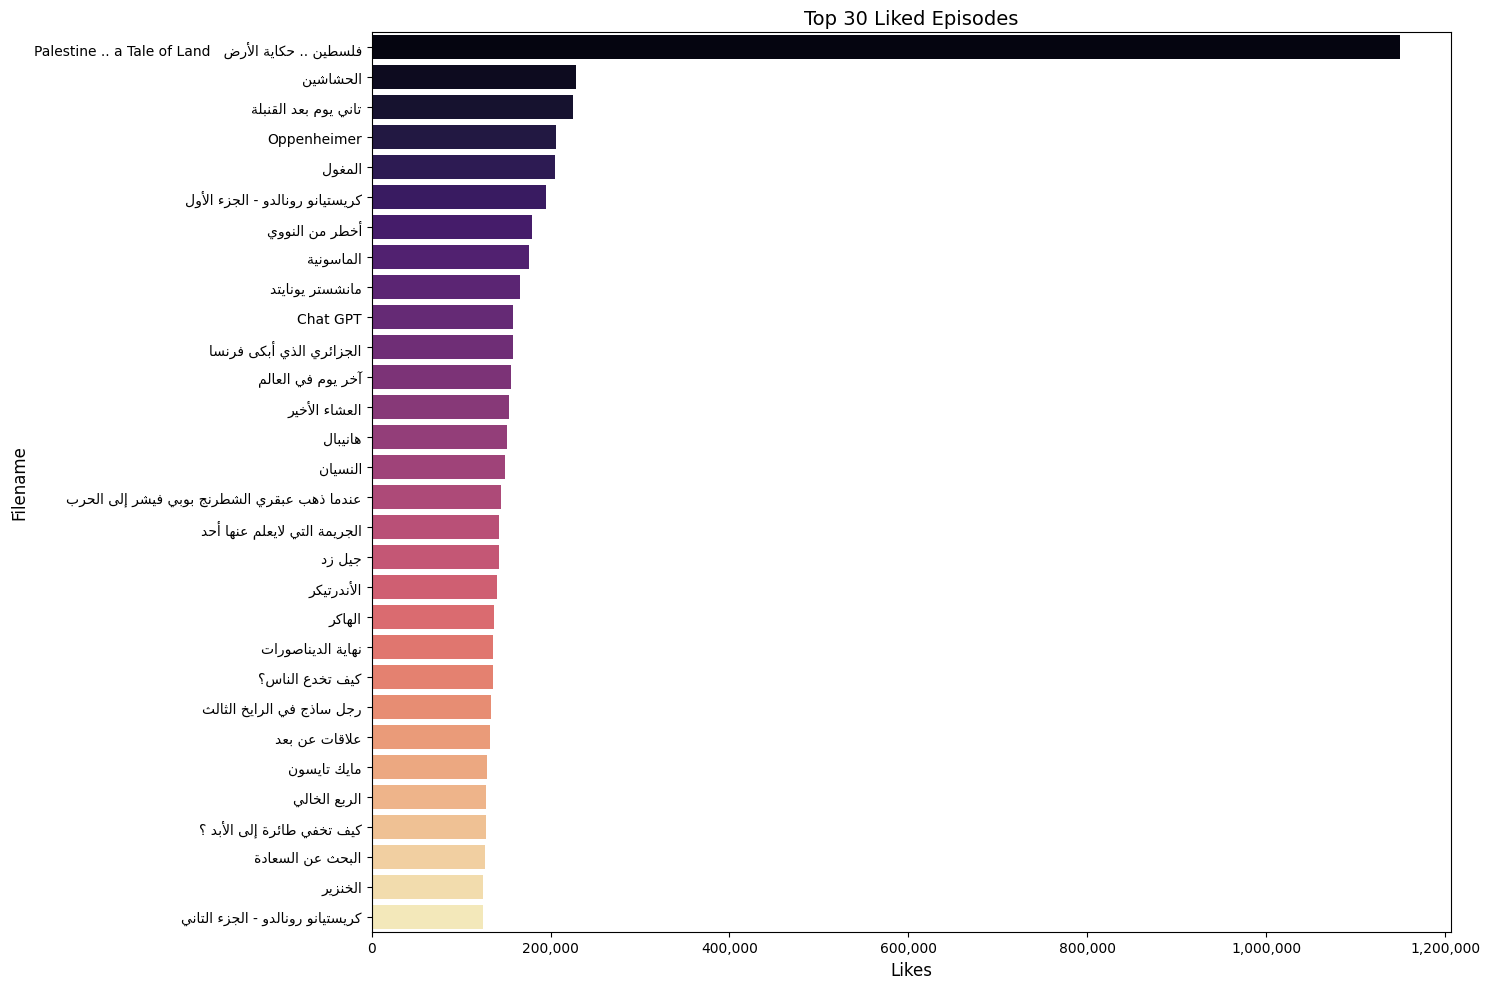

In [31]:
# Sort and select top 30 episodes
top_30_liked = df.sort_values('likes', ascending=False).head(30)

# Process Arabic text in the filename column
top_30_liked['processed_filename'] = top_30_liked['filename'].apply(process_arabic_text)

# Create the plot
plt.figure(figsize=(15, 10))

# Create horizontal bar plot of top 30
ax = sns.barplot(x='likes', y='processed_filename', data=top_30_liked, palette="magma")

# Format x-axis to show whole numbers
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Customize ticks and labels
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Filename", fontsize=12)
plt.title("Top 30 Liked Episodes", fontsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Checking the episode with highest comments

<ipython-input-32-1a1a43009a52>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='comments', y='processed_filename', data=top_30_commented, palette="magma")


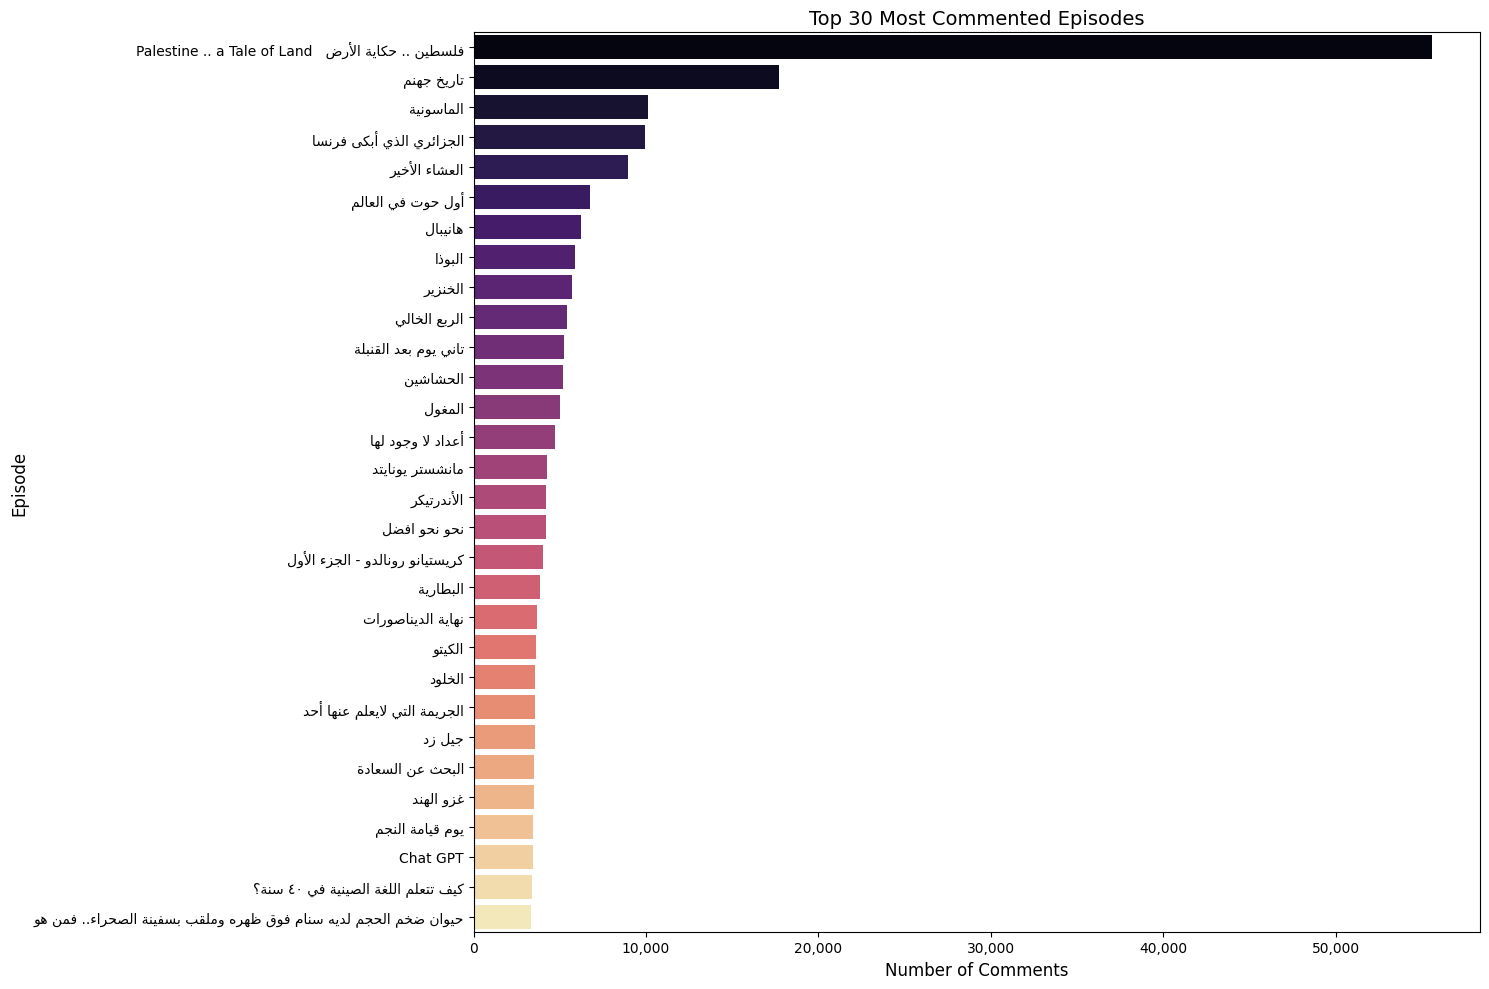

In [32]:
# Sort and select top 30 episodes based on comments
top_30_commented = df.sort_values('comments', ascending=False).head(30)

# Process Arabic text in the filename column
top_30_commented['processed_filename'] = top_30_commented['filename'].apply(process_arabic_text)

# Create the plot
plt.figure(figsize=(15, 10))

# Create horizontal bar plot of top 30 based on comments
ax = sns.barplot(x='comments', y='processed_filename', data=top_30_commented, palette="magma")

# Format x-axis to show whole numbers
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Customize ticks and labels
plt.xlabel("Number of Comments", fontsize=12)
plt.ylabel("Episode", fontsize=12)
plt.title("Top 30 Most Commented Episodes", fontsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Checking the most occurring words

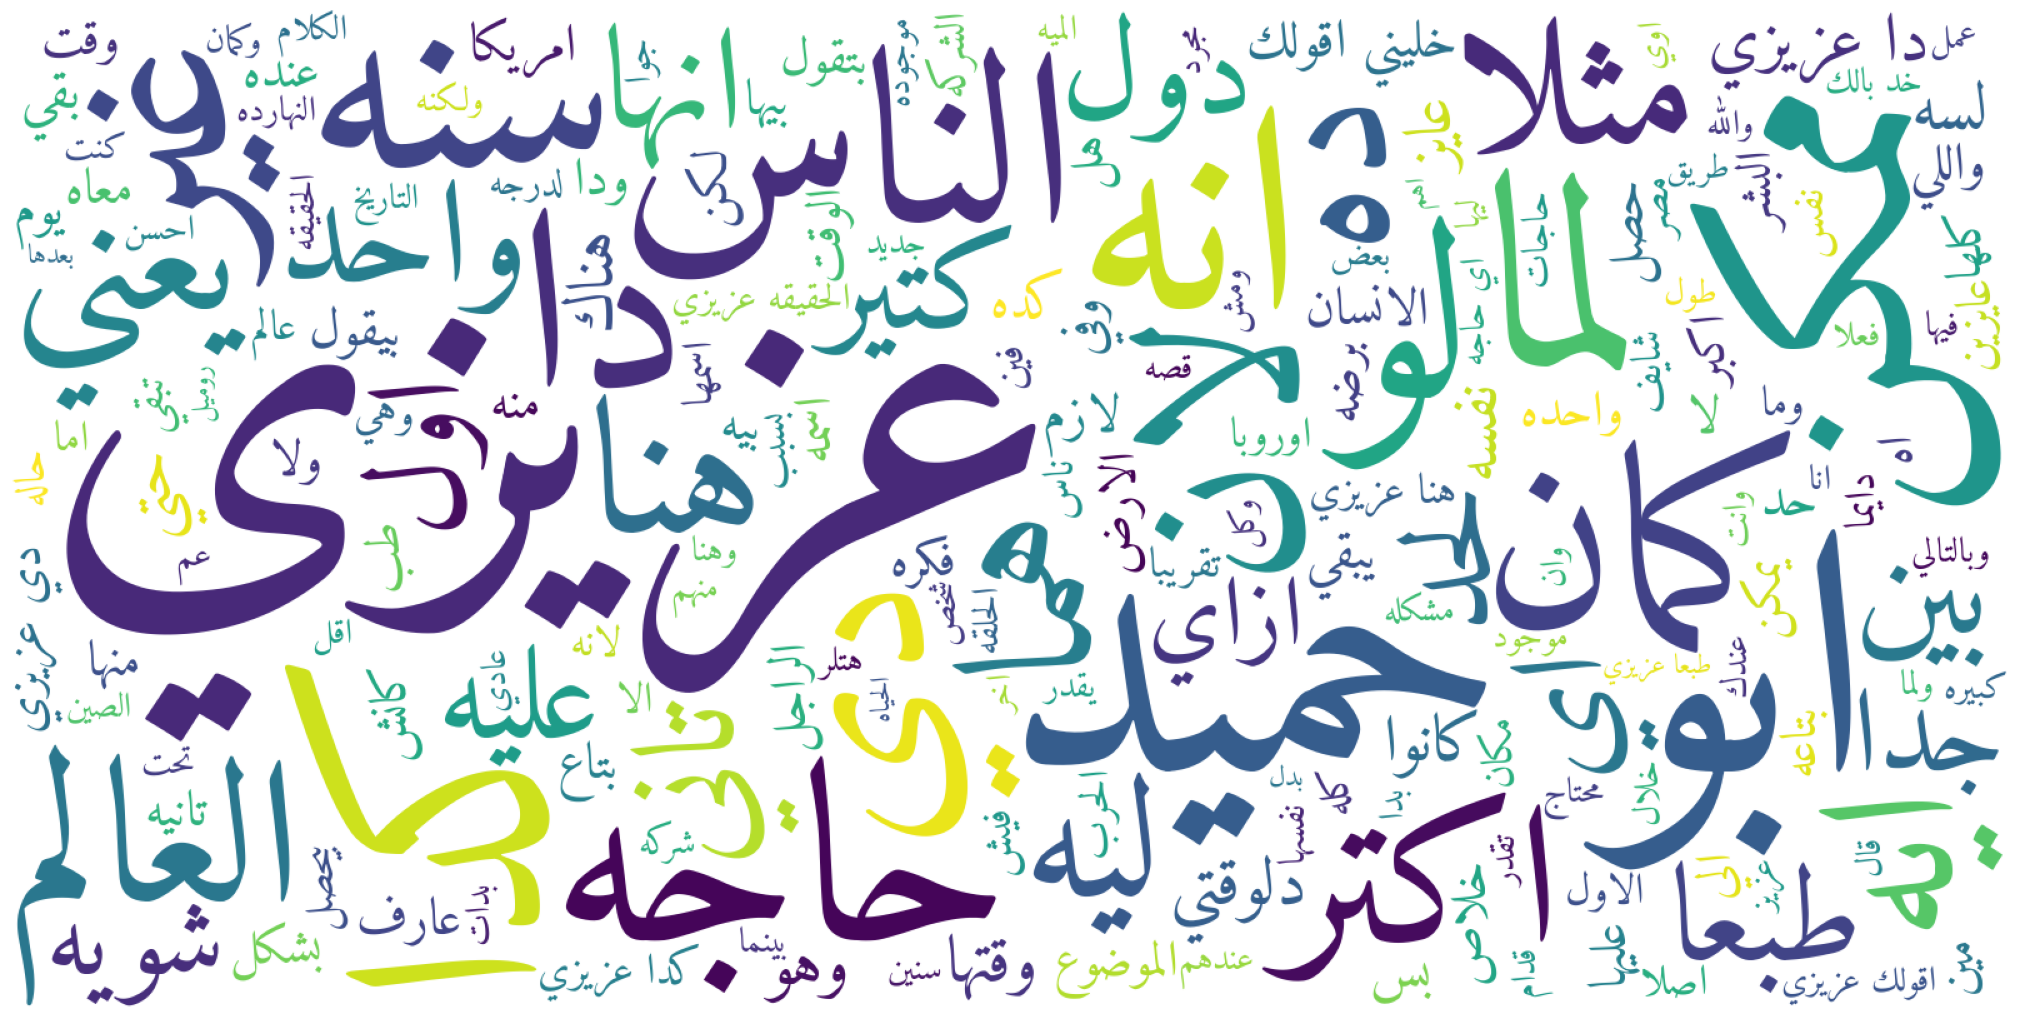

In [33]:
# Combine all text from the content column
all_text = ' '.join(df['content'])

# Create WordCloud with Arabic font support
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    font_path='/content/Amiri-Regular.ttf',  # Path to Amiri font
    max_words=200,
    font_step=2,
    prefer_horizontal=0.6,
    min_font_size=10
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(20,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Checking the most occuring categories

Based on the chart, the categories annotation is not imporant, it doesn't represent real categories. even if we dropped "el dahih" category, they're still very random and unuseful

In [34]:
def plot_top_categories(df, column, top_n=40):
    if column not in df.columns:
        print(f"Error: Column '{column}' not found in DataFrame.")
        return

    # Ensure all values are lists before exploding
    df[column] = df[column].apply(lambda x: x if isinstance(x, list) else [x])

    # Flatten lists into individual rows
    top_categories = df[column].explode().value_counts().head(top_n)

    processed_labels = [process_arabic_text(cat) for cat in top_categories.index]


    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_categories.values, y=processed_labels, palette="viridis")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.title(f"Top {top_n} Most Occurring Categories")
    plt.show()

<ipython-input-34-7ba7e7ce9f31>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=processed_labels, palette="viridis")


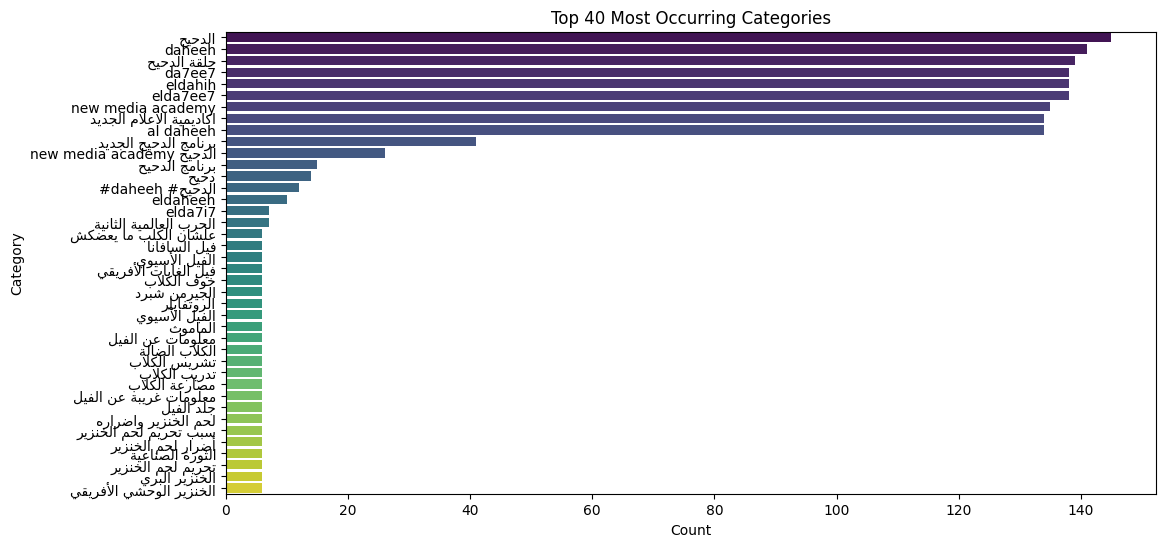

In [35]:
plot_top_categories(df, "categories", top_n=40)

## TFIDF

In [37]:
def compute_tfidf(df, text_column, max_features=1000):
    # Convert the text column to a list of documents
    documents = df[text_column].astype(str).tolist()

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=max_features)

    # Fit and transform the text data
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Convert the result to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    return tfidf_df

In [38]:
tfidf_result = compute_tfidf(df, "content")
print(tfidf_result.head())

         10       100        12        15        20        30        40  \
0  0.020988  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.008331  0.027475  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.009607  0.010561  0.013333  0.012116  0.032207  0.011387  0.000000   
3  0.006058  0.000000  0.000000  0.000000  0.013539  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.005291  0.004688  0.000000  0.005822   

         50       and        in  ...    يقولك       يكن       يلا      يمكن  \
0  0.000000  0.000000  0.000000  ...  0.00000  0.000000  0.009592  0.000000   
1  0.000000  0.028075  0.014834  ...  0.00000  0.000000  0.007615  0.021098   
2  0.000000  0.016188  0.000000  ...  0.02614  0.011486  0.026344  0.024330   
3  0.007711  0.030623  0.000000  ...  0.00000  0.000000  0.000000  0.005114   
4  0.000000  0.000000  0.000000  ...  0.00000  0.010032  0.000000  0.021249   

       يموت     ينفعش     يوصل       يوم  يونايتد      ييجي  
0  0.000000 

In [39]:
print(list(tfidf_result.columns))

['10', '100', '12', '15', '20', '30', '40', '50', 'and', 'in', 'marvel', 'of', 'that', 'the', 'to', 'you', 'ابدا', 'ابقي', 'ابل', 'ابن', 'ابني', 'ابو', 'ابوه', 'ابيض', 'اتنين', 'اثناء', 'احد', 'احسن', 'احمد', 'احنا', 'احيانا', 'اختراع', 'اخر', 'اخوه', 'اخيرا', 'اد', 'اديسون', 'اذا', 'ارجوك', 'ارض', 'ازاي', 'استاذ', 'استخدام', 'استني', 'اسطي', 'اسم', 'اسمه', 'اسمها', 'اسود', 'اسيا', 'اشهر', 'اصلا', 'اعرف', 'اعزايي', 'اعلي', 'اعمل', 'اغلب', 'افريقيا', 'افضل', 'اقل', 'اقول', 'اقولك', 'اقوي', 'اكبر', 'اكتر', 'اكثر', 'اكل', 'اكيد', 'الا', 'الاب', 'الاتحاد', 'الاتنين', 'الاخر', 'الارض', 'الاشعاع', 'الاطفال', 'الاف', 'الاقل', 'الاكسجين', 'الاكل', 'الالمان', 'الالماني', 'الام', 'الامريكان', 'الامريكي', 'الامريكيه', 'الانتخابات', 'الانجليز', 'الانجليزي', 'الانسان', 'الاول', 'الاولي', 'الباحثين', 'البحر', 'البرنامج', 'البريطاني', 'البشر', 'البشريه', 'البطاطس', 'البكتيريا', 'البلد', 'البيت', 'البييه', 'التاريخ', 'التاني', 'التانيه', 'التجربه', 'التشريح', 'التوحد', 'التيار', 'الثوره', 'الجايه', 'ا

In [40]:
print((tfidf_result["in"]))

0      0.000000
1      0.014834
2      0.000000
3      0.000000
4      0.000000
         ...   
140    0.000000
141    0.000000
142    0.000000
143    0.000000
144    0.000000
Name: in, Length: 145, dtype: float64


In [41]:
def plot_tfidf_word(tfidf_df, word):
    if word not in tfidf_df.columns:
        print(f"'{word}' not found in the TF-IDF results.")
        return

    # Extract the TF-IDF scores for the word
    word_scores = tfidf_df[word]

    # Plot the values
    plt.figure(figsize=(12, 6))
    sns.barplot(x=word_scores.index, y=word_scores.values, palette="viridis")

    # Label the chart
    plt.xlabel("Document Index")
    plt.ylabel("TF-IDF Score")
    plt.title(f"TF-IDF Scores for the word: '{word}'")

    # Show the plot
    plt.show()

<ipython-input-41-8f8f21cb02a4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_scores.index, y=word_scores.values, palette="viridis")


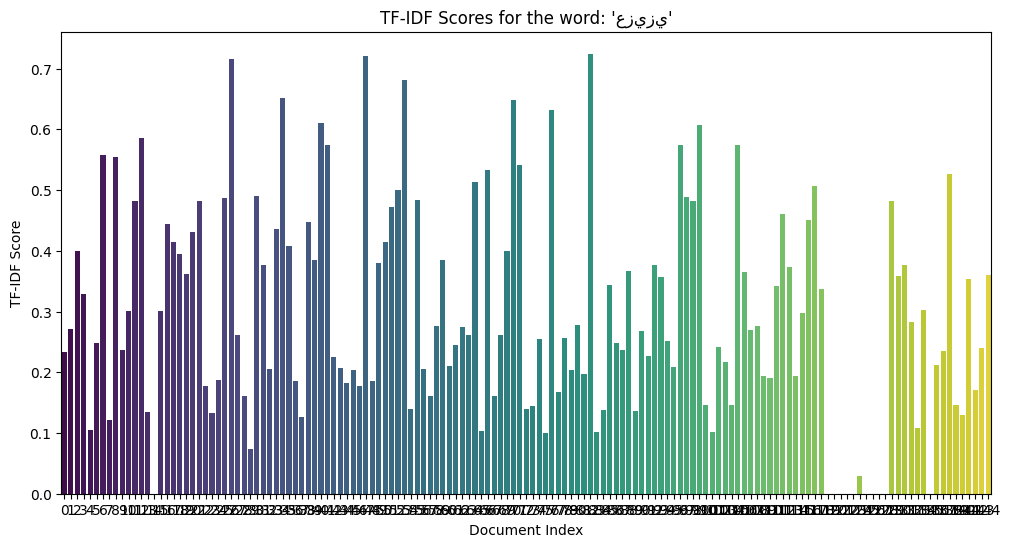

In [42]:
plot_tfidf_word(tfidf_result, "عزيزي")

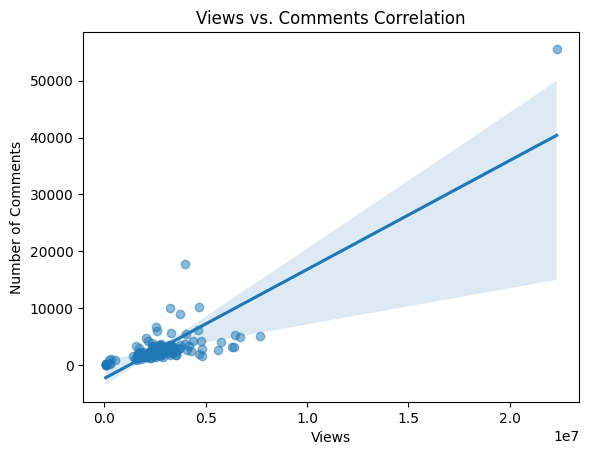

In [43]:
sns.regplot(data=df, x="views", y="comments", scatter_kws={"alpha":0.5})
plt.xlabel("Views")
plt.ylabel("Number of Comments")
plt.title("Views vs. Comments Correlation")
plt.show()